# **Section 1**

#Probabilistic ML models

Topics:
1. Convolutional Operation
2. CNN and Using Learnt Representations
3. CNN Visualization

## 1. Convolutional Operations

Central to Convolutional Neural Networks (CNN), a convolution operation is a linear operation which involves element-wise multiplication between a small filter (say, a matrix of integers) and filter-sized patch from the image. We move this filter across the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image $f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>


Image reference: [Streaming Architecture for Large-Scale Quantized Neural Networks on an FPGA-Based Dataflow Platform](https://www.researchgate.net/publication/318849314_Streaming_Architecture_for_Large-Scale_Quantized_Neural_Networks_on_an_FPGA-Based_Dataflow_Platform/figures?lo=1)

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

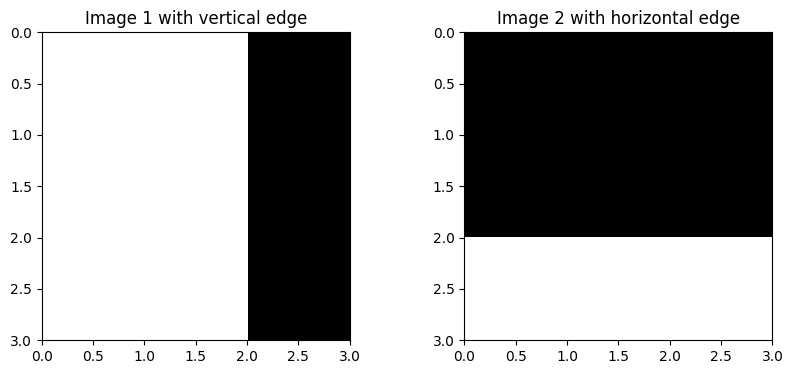

In [2]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0],
                   [1,1,0],
                   [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0],
                   [0,0,0],
                   [1,1,1]])

# print(image1*255)
# Let's plot the images
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
# plt.ylim(0, 3)
ax.set_title('Image 1 with vertical edge')

ax = fig.add_subplot(1,2,2)
ax.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
ax.set_title('Image 2 with horizontal edge')
plt.show()

Let's create a 3x3 vertical edge filter. We will 'convolve' this filter over the images to detect vertical edge. As the image is same size as of filter, this is simple element-wise multiplication and summing up the result into single value.

In [3]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

In [4]:
# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image.
Now, let's create a horizontal edge filter and apply it to both the above images.

In [5]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


As expected, the horizontal edge is detected in second image with this filter.

Now, we will take a bigger image (5 x 5) and see how a convolution operation works by sliding a filter left to right and top to bottom to obtain an output map from image. Let's define a function ***apply_filter()*** for this.

In [6]:
def apply_filter(img, filter):
  height, width = img.shape
  filter_size = filter.shape

  output = np.empty(0)

  # Move the filter over entire image and store the result in output
  for i in range(0, height - filter_size[1] + 1):
    for j in range(0, width - filter_size[0] + 1):
      # Matrix multiplication for a single patch of image and filter
      output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))

  # Calculate the output shape of the resultant image
  output_shape = (height - (filter_size[1]-1)), (width - (filter_size[0]-1))

  # Return the reshaped image
  return output.reshape(output_shape)

Plotting function

In [7]:
def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()

In [8]:
# 2D image
img = np.array([[20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0]])

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])


output = apply_filter(img, filter)
print(output) # Note the shape of output image!

[[60. 60.  0.]
 [60. 60.  0.]
 [60. 60.  0.]]


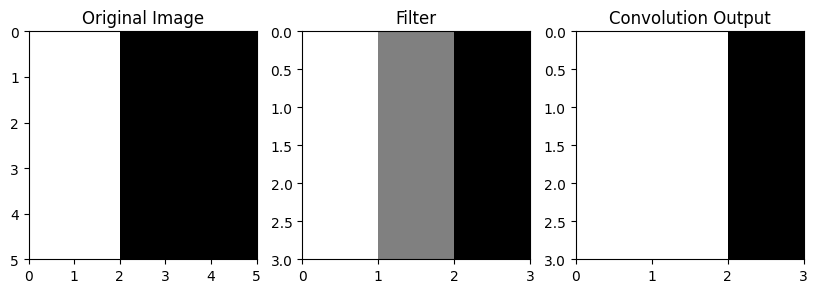

In [9]:
# Let's plot the above image with results
images = []
titles = []

images.append(img)
titles.append('Original Image')

images.append(filter)
titles.append('Filter')

images.append(output)
titles.append('Convolution Output')

plot_images(images, titles)

As, you can see, horizontal edge is detected in the output.

Now, we will see the effect of applying this filter on a grayscale image. Again, for this, we need to 'convolve' the filter over the entire image.
We will use the same filter and function defined earlier.

In [10]:
# Get the sample image
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   1597      0  0:00:01  0:00:01 --:--:-- 10503


Original image size:  (99, 100)
Output image size:  (97, 98)


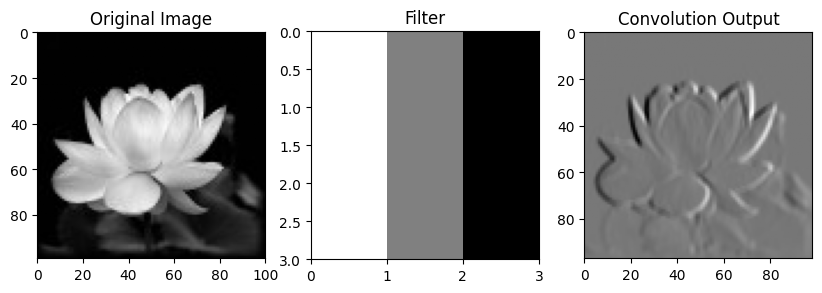

In [11]:
# Read the image with opencv, 0 stands for 'grayscale'
image = cv2.imread('lotus.jpg', 0)
print('Original image size: ', image.shape)

# Saving images for plots
images = []
titles = []

images.append(image)
titles.append('Original Image')

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

images.append(filter)
titles.append('Filter')

# Apply this filter to image
output = apply_filter(image, filter)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output')

# Let's plot the images
plot_images(images, titles)

### Exercise
1. Try padding in convolution on lotus.jpg and show results
2. Try stride  in convolution on lotus.jpg and show results

## 2. CNN and Using Learnt Representations

Now lets implement a CNN in pytorch and use the learnt representations for image classification of MNIST dataset.

<img src='https://miro.medium.com/max/1872/1*SGPGG7oeSvVlV5sOSQ2iZw.png' />

Image reference: https://miro.medium.com/max/1872/1*SGPGG7oeSvVlV5sOSQ2iZw.png

We will be implementing a CNN model which can predict the digit, given a grayscale image. The architecture of model is given in the above image.

**We will do the following steps in order:**
1.   Load and visualize MNIST training and test datasets using torchvision
2.   Define the CNN model
3.   Define a loss function and optimizer
4.   Train the network on the training data
5.   Evaluate the network on the test data

In [12]:
# Import packages
import torch
import torchvision
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np


In [13]:
# Device configuration (whether to run on GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
# Set seeds for reproducibility
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

#### Load MNIST data
We will use the [MNIST dataset](https://pytorch.org/vision/stable/datasets.html#mnist) from torchvision Pytorch and setup the train and test dataloaders.

In [15]:
batch_size_train = 128
batch_size_test = 128

# Images in torchvision datasets are PIL Images in range [0,1] so we need
# 'ToTensor' transform to convert them into tensors
train_data = torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_test, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.07MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.36MB/s]


#### Understand the dataset
Let us now visualize the dataset in terms of number of samples, classes etc.

In [16]:
print('Training data shape : ', train_data.data.shape, train_data.targets.shape)
print('Testing data shape : ', test_data.data.shape, test_data.targets.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_data.targets.numpy())
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  torch.Size([60000, 28, 28]) torch.Size([60000])
Testing data shape :  torch.Size([10000, 28, 28]) torch.Size([10000])
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [17]:
# Helper function to plot data
def plot_data(images, labels, classes=None):
  figure = plt.figure(figsize=(9, 4))
  cols, rows = 5, 2
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(images), size=(1,)).item()
      img, label = images[sample_idx], labels[sample_idx]
      figure.add_subplot(rows, cols, i)
      if classes is not None:
        label = classes[label]
      plt.title('Label:' +str(label))
      plt.axis("off")
      plt.imshow(img.squeeze(), cmap="gray")
  plt.show()

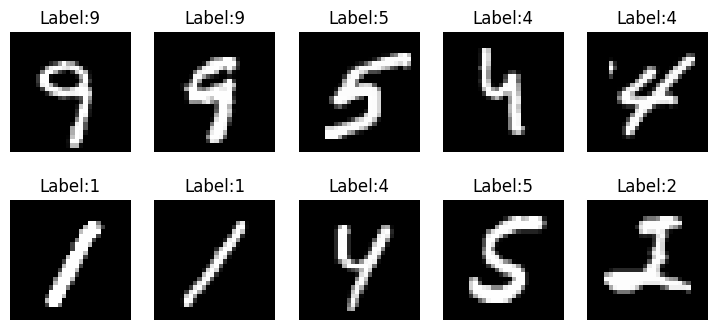

In [18]:
plot_data(train_data.data, train_data.targets.numpy())

#### Define the model

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # fully connected layer
        self.fc = nn.Linear(64 * 7 * 7, 128)
        # output layer 10 classes
        self.out = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x) #activation
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)
        # flatten the output for FC layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        output = self.out(x)
        return output

In [20]:
# Build the model object and put on the device
model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3136, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)


#### Define Loss function

In [21]:
# Cross Entropy loss for multi-class classification
loss_func = nn.CrossEntropyLoss()

#### Define optimizer

In [22]:
# Basic SGD optimizer with 0.01 learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.01)

#### Train the model

Helper function for training/testing

In [23]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Put data on devices
      images = images.to(device)
      labels = labels.to(device)

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [24]:
def test(model, test_loader):
  # Eval mode
  model.eval()
  test_acc = 0
  correct = 0
  for i, (images, labels) in enumerate(test_loader):
    # Deactivate autograd engine (don't compute grads since we're not training)
    with torch.no_grad():
      images, labels = images.to(device), labels.to(device)
      output = model(images)

      # Calculate number of correct predictions
      _, preds = torch.max(output, dim=1)
      correct += (preds == labels).sum()

  test_acc = correct / len(test_loader.dataset)
  print('Test Accuracy: {:.4f}'.format(test_acc*100))

  # Plot the images with predicted labels
  plot_data(images.data.cpu().numpy(), preds.data.cpu().numpy(), test_loader.dataset.classes)

Start training

In [25]:
num_epochs = 10  # iterations
train_losses, train_acc = train(num_epochs, model, train_loader, loss_func, optimizer)

Epoch 1/10, Loss: 0.0115, Accuracy: 63.7583
Epoch 2/10, Loss: 0.0029, Accuracy: 89.0600
Epoch 3/10, Loss: 0.0022, Accuracy: 91.6233
Epoch 4/10, Loss: 0.0018, Accuracy: 93.1517
Epoch 5/10, Loss: 0.0015, Accuracy: 94.3717
Epoch 6/10, Loss: 0.0013, Accuracy: 95.3033
Epoch 7/10, Loss: 0.0011, Accuracy: 95.8450
Epoch 8/10, Loss: 0.0010, Accuracy: 96.3667
Epoch 9/10, Loss: 0.0009, Accuracy: 96.6967
Epoch 10/10, Loss: 0.0008, Accuracy: 97.0150


Plot training plots

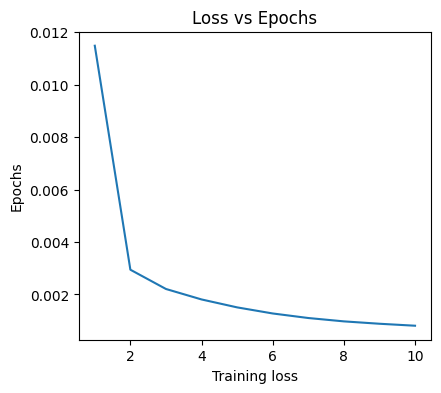

In [26]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
plt.show()

#### Evaluate the model

Test Accuracy: 97.2600


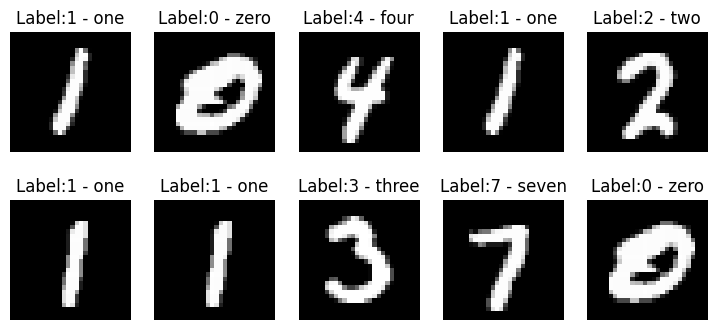

In [27]:
# Evaluate the model on testing data and plot predictions
test(model, test_loader)

### Exercises

Q 1: What is the ratio of parameters in single 5 x 5 kernel and equivalent stacked 3 x 3 kernels? Consider number of channels in input and output channels as C.

Q 2: How can you replace 7 x 7 convolution kernel using only 3 x 3 kernels? What would be ratio of parameters in this case? Consider number of channels in input and output channels as C.

1.Single 5x5 kernel:

Parameters = (kernel_height * kernel_width * input_channels) * output_channels
Parameters (5x5) = (5 * 5 * C) * C = 25 * C^2
Equivalent stacked 3x3 kernels:

To achieve a receptive field equivalent to a 5x5 kernel, we can stack two 3x3 kernels (e.g., receptive_field_size = (kernel_size - 1) * num_layers + 1). For two 3x3 layers, (3-1)*2 + 1 = 5.
First 3x3 kernel: Parameters = (3 * 3 * C) * C = 9 * C^2
Second 3x3 kernel: Parameters = (3 * 3 * C) * C = 9 * C^2
Total parameters (stacked 3x3) = 9 * C^2 + 9 * C^2 = 18 * C^2
Ratio of parameters (5x5 / stacked 3x3):

Ratio = (25 * C^2) / (18 * C^2) = 25 / 18 \approx 1.388
This means a single 5x5 kernel has approximately 1.388 times more parameters than two stacked 3x3 kernels achieving the same receptive field.                                             2.Single 7x7 kernel:

Parameters = (kernel_height * kernel_width * input_channels) * output_channels
Parameters (7x7) = (7 * 7 * C) * C = 49 * C^2
Replacing with 3x3 kernels:

To achieve a receptive field equivalent to a 7x7 kernel, we can stack three 3x3 kernels. For three 3x3 layers, receptive_field_size = (3-1)*3 + 1 = 7.
Each 3x3 kernel has parameters = (3 * 3 * C) * C = 9 * C^2
Total parameters (three stacked 3x3) = 3 * (9 * C^2) = 27 * C^2
Ratio of parameters (7x7 / three stacked 3x3):

Ratio = (49 * C^2) / (27 * C^2) = 49 / 27 \approx 1.814
This shows that a single 7x7 kernel has approximately 1.814 times more parameters than three stacked 3x3 kernels achieving the same receptive field. Using smaller, stacked kernels often leads to fewer parameters, which can reduce overfitting and computational cost.

## 3. CNN Visualization

Save the conv layers and their weights

In [28]:
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the conv layers in this list
# get all the model children as list
model_children = list(model.children())

# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 2


In [29]:
# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([32, 1, 3, 3])
CONV: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([64, 32, 3, 3])


### Visualize the CONV layer filters

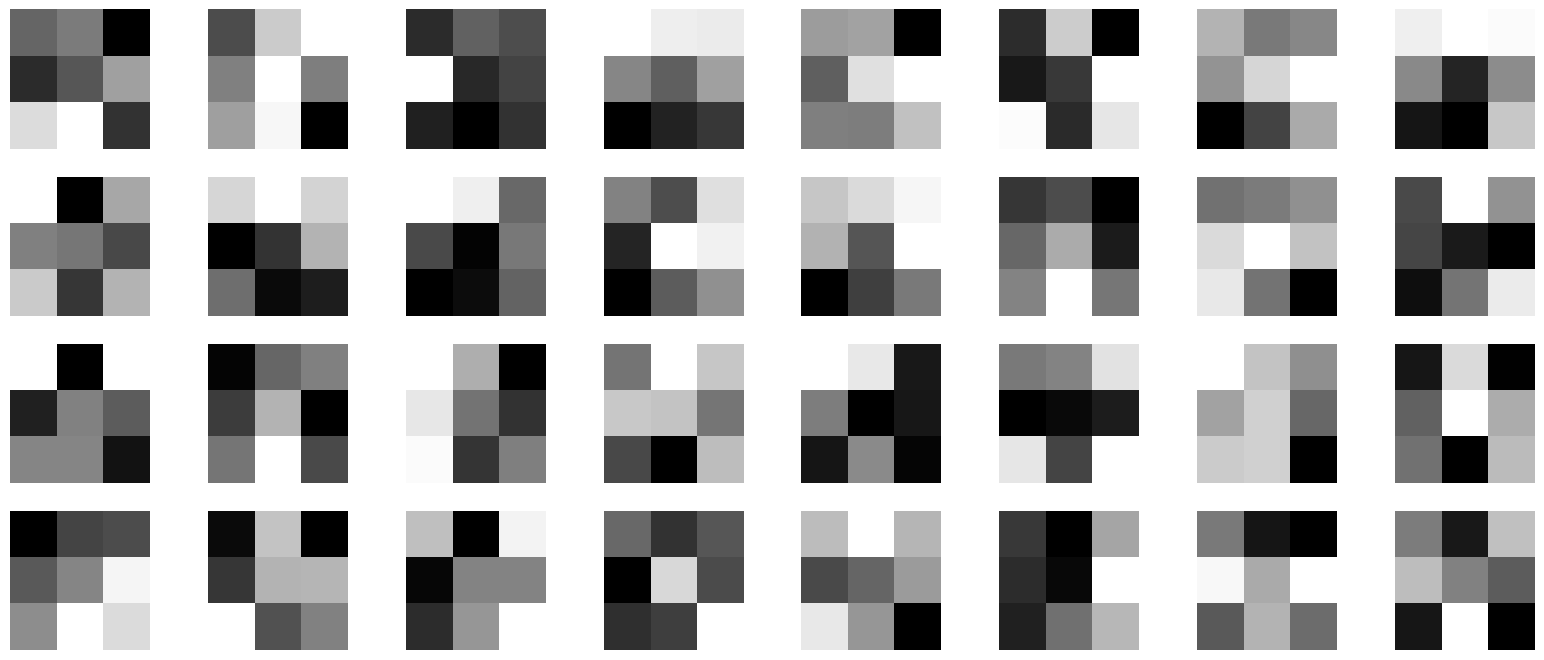

In [30]:
# Visualize the conv layer filters
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8)
    plt.imshow(filter[0, :, :].data.cpu().numpy(), cmap='gray')
    plt.axis('off')
plt.show()

### Visualize filter outputs on an image
Get an image from test dataset

2
5
8
1
2
8
6
5
1
6
5
2
6
4
9
6
9
8
3
2
8
5
0
3
1
2
7
1
7


/tmp/ipython-input-1557531871.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(3, 3))


7
4
7
3
7
0
4
4
8
7
7
7
0
9
0
5
2
1
7
8
4
9
4
8
2
1
7
4
8
4
8
6
5
4
8
4
7
1
4
9
7
4
9
3
1
4
0
5
8
2


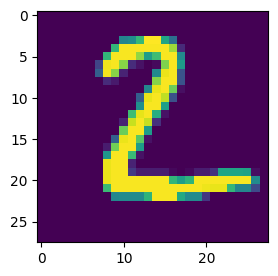

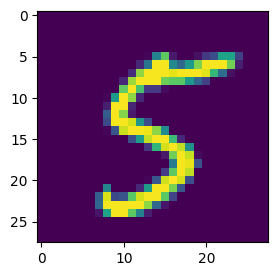

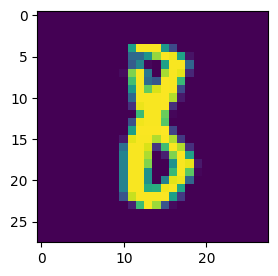

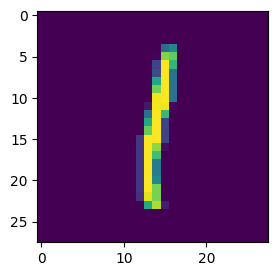

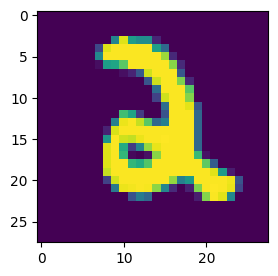

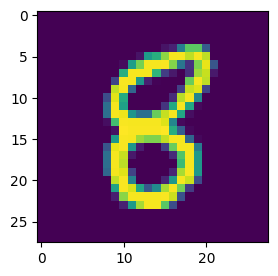

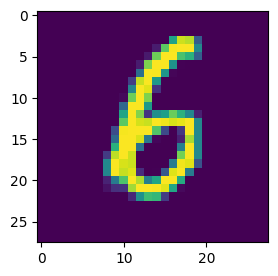

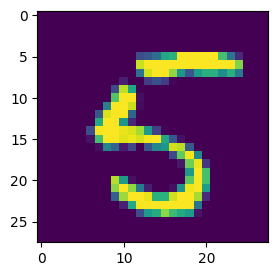

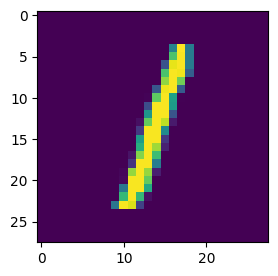

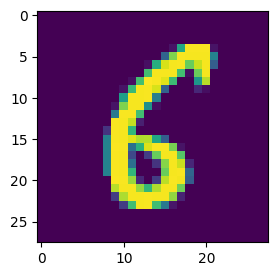

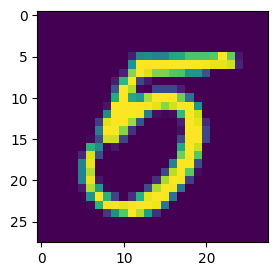

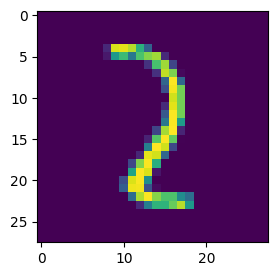

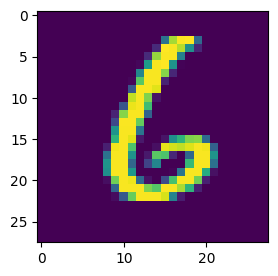

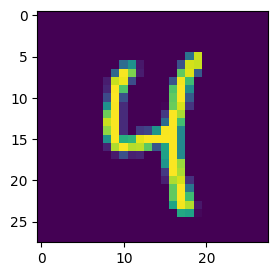

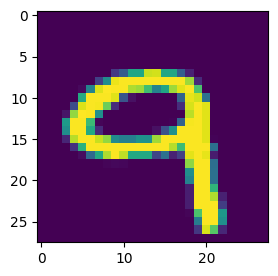

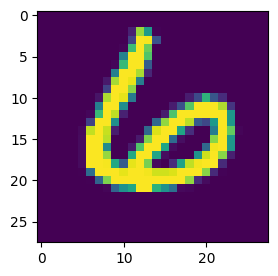

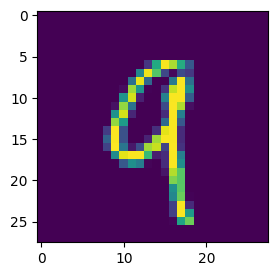

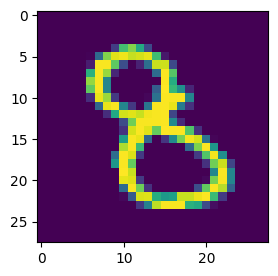

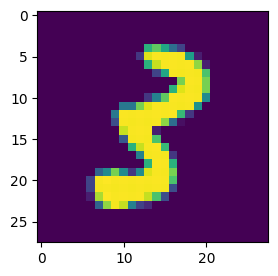

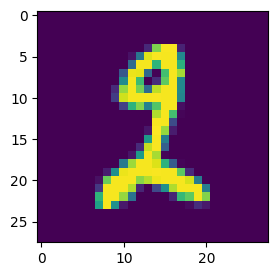

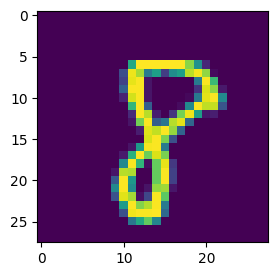

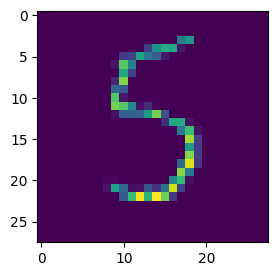

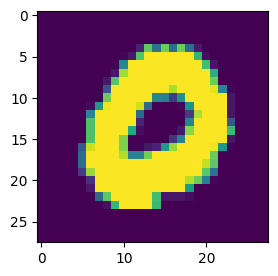

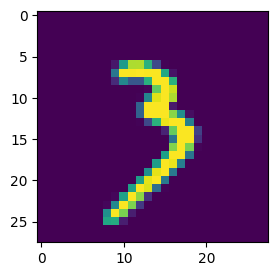

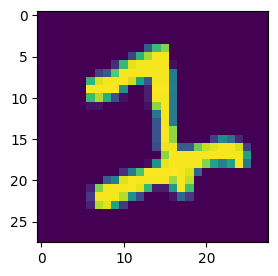

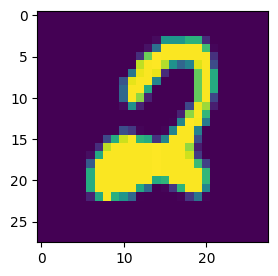

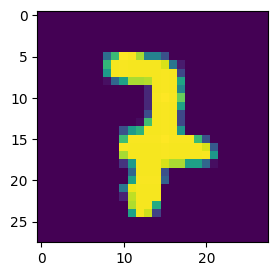

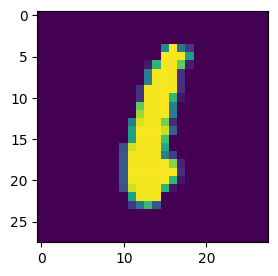

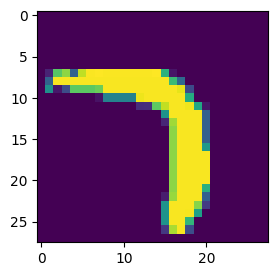

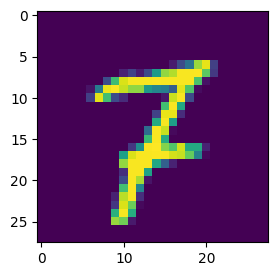

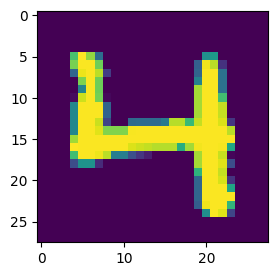

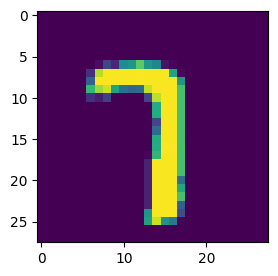

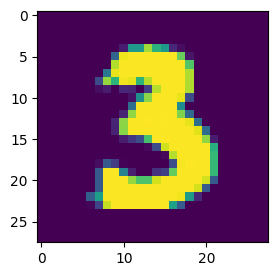

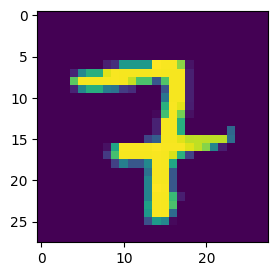

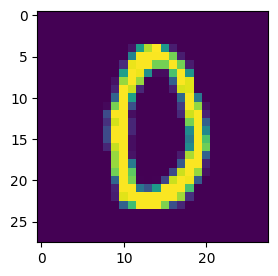

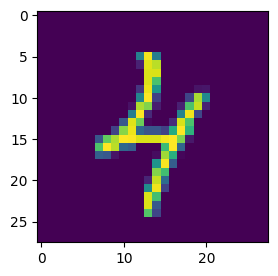

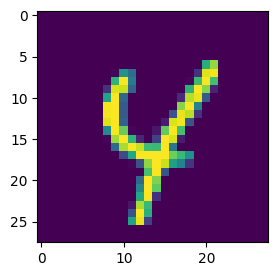

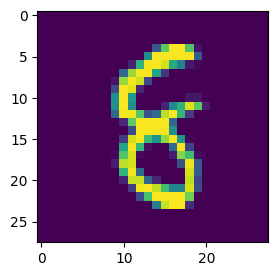

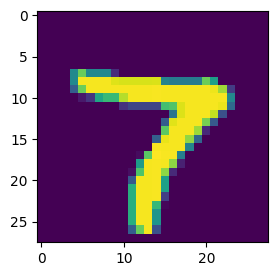

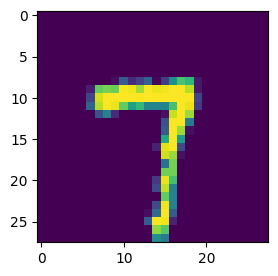

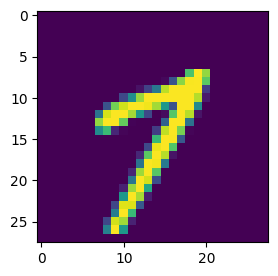

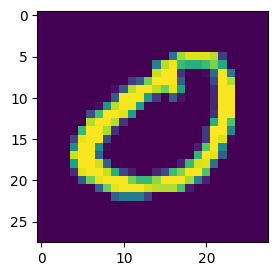

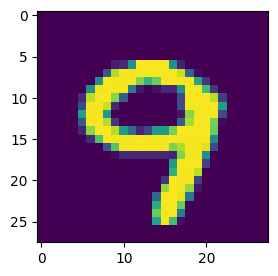

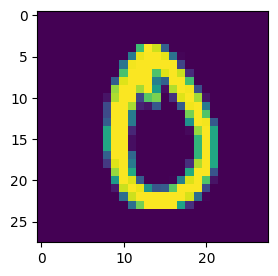

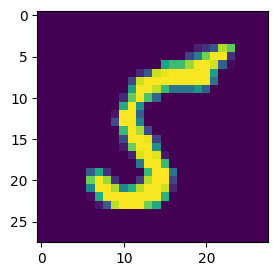

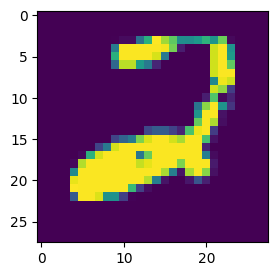

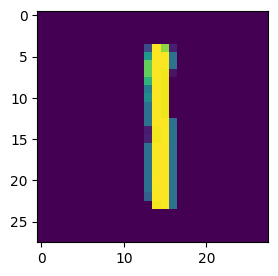

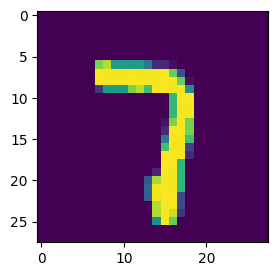

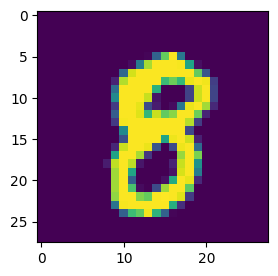

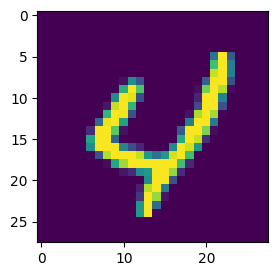

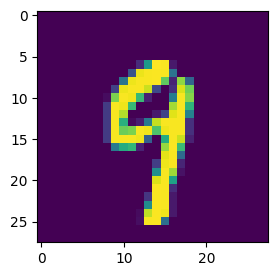

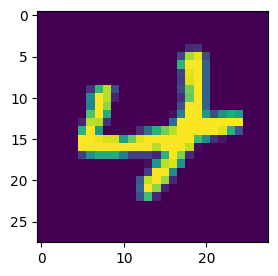

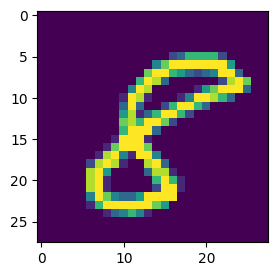

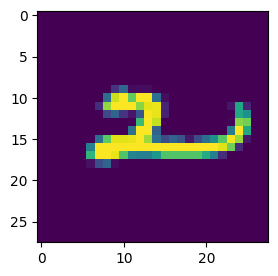

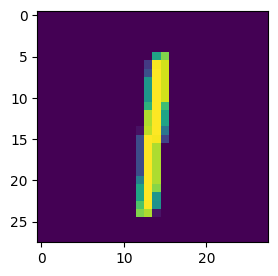

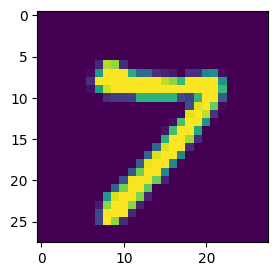

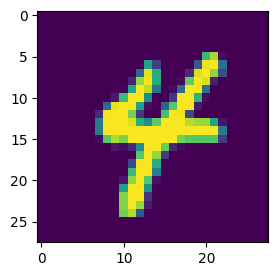

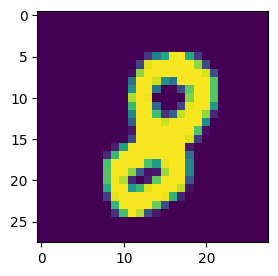

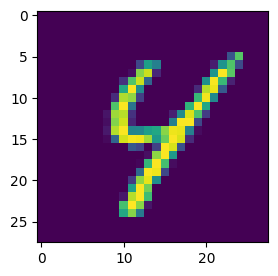

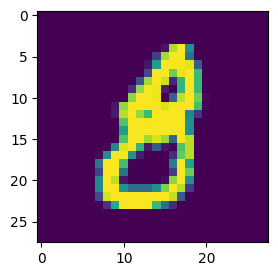

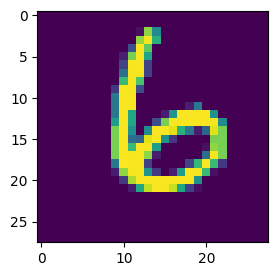

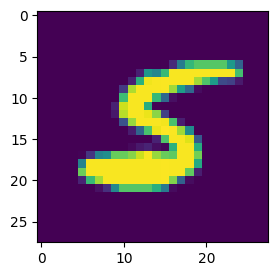

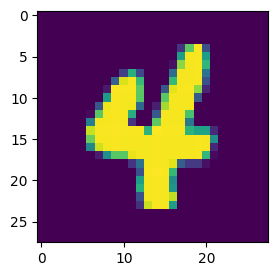

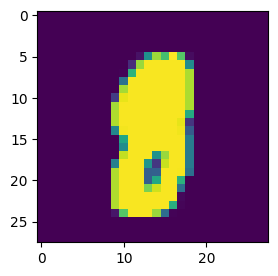

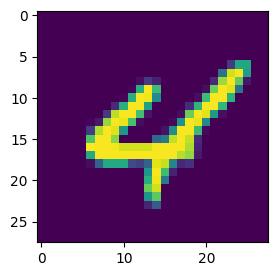

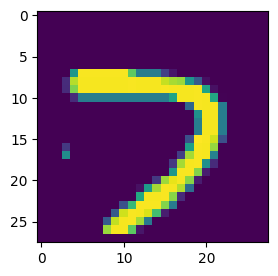

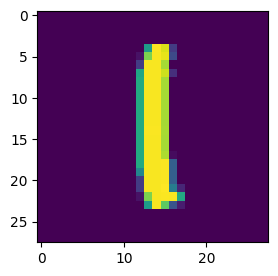

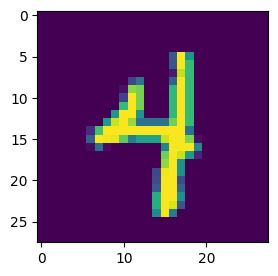

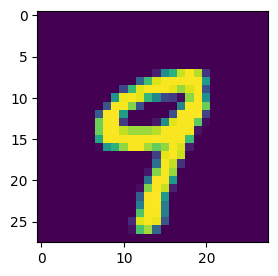

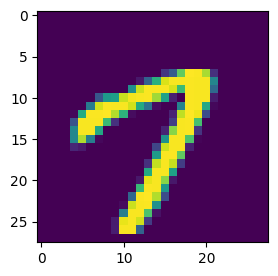

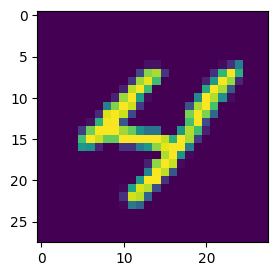

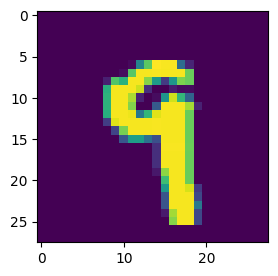

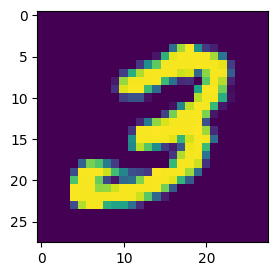

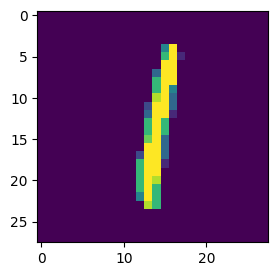

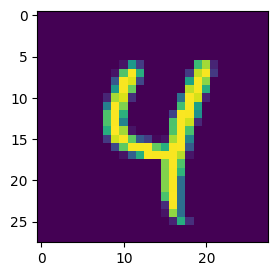

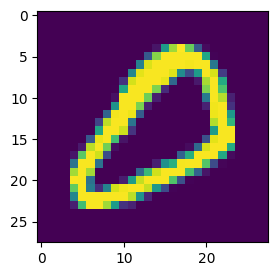

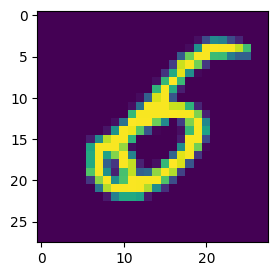

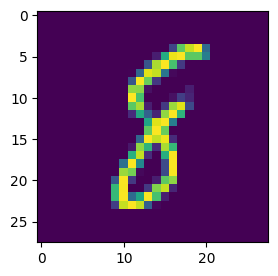

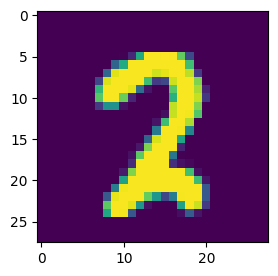

In [31]:
dataiter = iter(test_loader)
for images, labels in dataiter:
    img = images[1]
    fig = plt.figure(figsize=(3, 3))
    plt.imshow(img.reshape((28, 28)))
    print(classes[labels[1].item()])

Forward pass the image through saved conv layers

In [32]:
results = [conv_layers[0](img.to(device))]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

Visualize features from each layer

Layer output size: torch.Size([32, 28, 28])
Layer 0 feature maps...


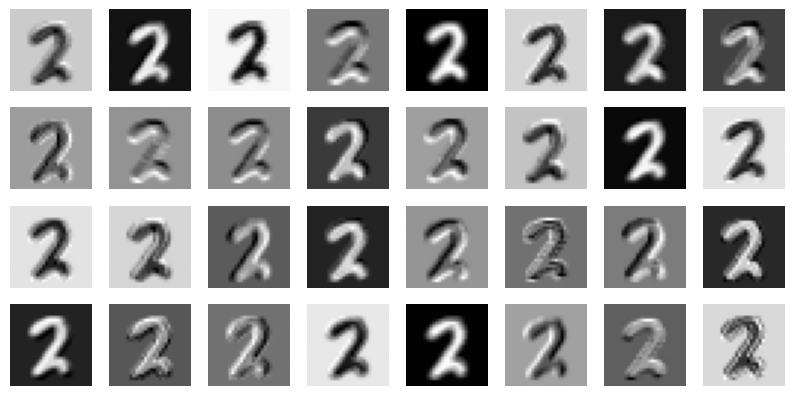

Layer output size: torch.Size([64, 28, 28])
Layer 1 feature maps...


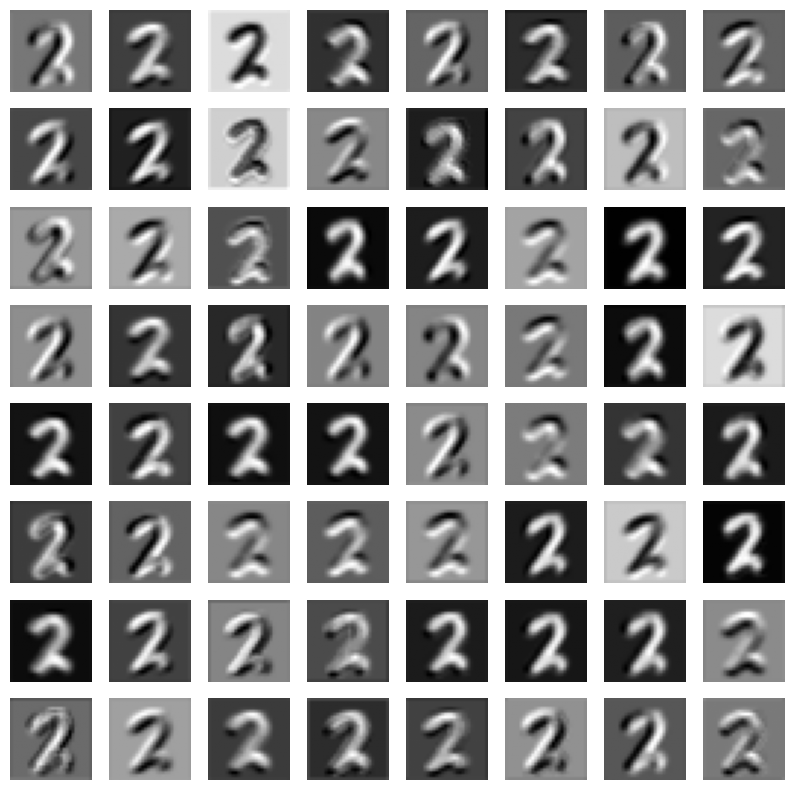

In [33]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(10, 10))
    layer_viz = outputs[num_layer][:, :, :]
    layer_viz = layer_viz.data
    print('Layer output size:', layer_viz.size())
    for i, filter in enumerate(layer_viz):
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter.cpu().numpy(), cmap='gray')
        plt.axis("off")
    print(f"Layer {num_layer} feature maps...")
    plt.show()
    plt.close()

### Exercises

Q: List a few practical applications of convolutional autoencoders.

Q: What change do we need to make for the autoencoder to reduce into PCA?


Here are a few practical applications of convolutional autoencoders, followed by how to make an autoencoder reduce to PCA:

Practical Applications of Convolutional Autoencoders:

Image Denoising: Autoencoders can learn to remove noise from images by being trained to reconstruct clean images from noisy inputs.
Anomaly Detection: By learning a representation of 'normal' data, an autoencoder can identify anomalies as data points that result in high reconstruction error.
Image Compression: Autoencoders can compress images into a lower-dimensional latent space and then reconstruct them, providing a form of learned image compression.
Feature Learning/Dimensionality Reduction: The bottleneck layer of an autoencoder learns a compact representation (features) of the input data, which can then be used for other tasks like classification or clustering.
Image Generation/Inpainting: While not their primary function, autoencoders (especially more advanced variants like VAEs) can be used for generating new images or filling in missing parts of an image.
How to make an Autoencoder reduce into PCA:

To make an autoencoder reduce into Principal Component Analysis (PCA), you need to impose the following constraints on its architecture and training:

Linear Activation Functions: Both the encoder and decoder must use linear activation functions (no non-linearities like ReLU or sigmoid).
No Hidden Layers (or a single hidden layer): The autoencoder should essentially be a single hidden layer (the bottleneck layer) between the input and output, performing a linear transformation.
Mean Squared Error (MSE) Loss Function: The autoencoder should be trained to minimize the Mean Squared Error between the input and the reconstructed output.
Weight Tying (Optional but beneficial): Tying the weights of the decoder to be the transpose of the encoder's weights ($W_{decoder} = W_{encoder}^T$$W_{decoder} = W_{encoder}^T$) can further align it with PCA, though it's not strictly necessary for it to be PCA



# **Section 2**

# The following topics will be covered in this section:
1. Effect of padding, kernel size and stride
2. Pooling
3. Transfer learning and fine-tuning

## 1. Effect of padding, kernel size and stride
We will directly use convolution layer in the **Pytorch** framework. Refer [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) for more information about additional parameters.

In [34]:
# Import pytorch packages
import torch
from torch.nn import Conv2d
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [35]:
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   2830      0 --:--:-- --:--:-- --:--:--  5552


##### Convolution in pytorch

We will define a helper function to create an square vertical edge filter of given size

In [36]:
def generate_filter(k=3):
  kernel = np.ones((k, k))
  mid_index = k // 2
  kernel[:, mid_index].fill(0)
  kernel[:, mid_index+1:] *= -1
  return kernel

We will create a helper function that takes one of the kernel elements, create a Convolution layer using pytorch and return the output image

In [37]:
def apply_conv(image, kernel_size, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  # Convert image to tensor from numpy
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  # Create a nxn kernel
  kernel = generate_filter(kernel_size)

  # Create a tensor from the numpy array
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER--------
  #1 input image channel, 1 output channels, nxn square convolution with padding on all 4 sides
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input / 255.)  # Getting input from 0 to 1
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

##### Effect of Padding
Change the padding value with the slider. What do you observe?

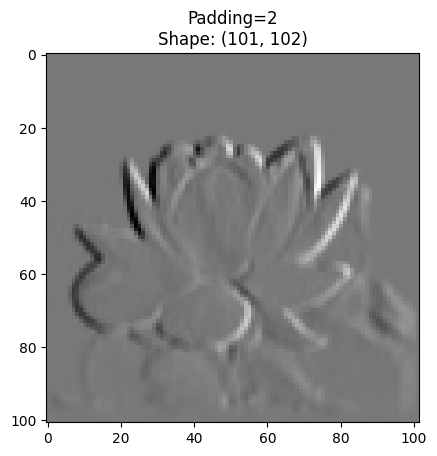

In [38]:
#@title Effect of padding { run: "auto", vertical-output: true, display-mode: "both" }

# Note:After running this cell manually, it will auto-run if you
# change the selected value.

# Our original lotus image
image = cv2.imread('lotus.jpg', 0)


# Apply 3x3 convolution to image with given padding 1 on all 4 sides
padding = 2 #@param {type:"slider", min:1, max:20, step:1}
n = apply_conv(image, 3, padding=padding)

# Plot the results
plt.imshow(n, cmap='gray')
plt.title('Padding={}\nShape: {}'.format(padding, str(n.shape)))
plt.show()

As you observed, the output shape changes with padding. More the padding, bigger will be the image.

##### Effect of Kernel size
Change the kernel size with the slider. What do you observe?

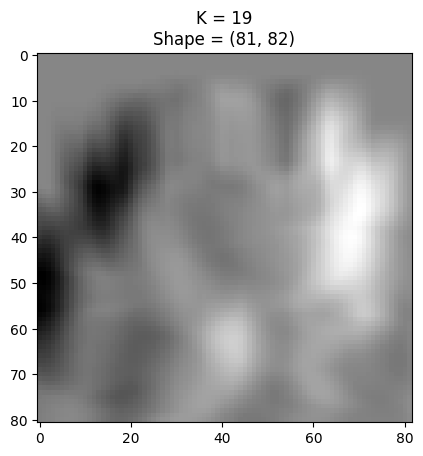

In [39]:
#@title Effect of Kernel size { run: "auto", vertical-output: true, display-mode: "both" }
# Our original lotus image
image = cv2.imread('lotus.jpg', 0)

# Apply 3x3 convolution to image
K = 19 #@param {type:"slider", min:3, max:21, step:2}
n = apply_conv(image, K)

# Plot result
plt.imshow(n, cmap='gray')
plt.title('K = {}\nShape = {}'.format(K, str(n.shape)))
plt.show()

Thus, we conclude that output image becomes blurry with increase in kernel size as summation occurs over larger neighbourhood. Smaller kernel size is used to capture details whereas larger kernel captures bigger elements in image.

##### Effect of Stride
Change the stride value with the slider. What do you observe?

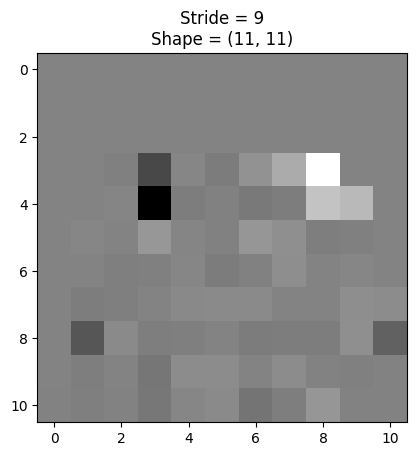

In [40]:
#@title Effect of Stride { run: "auto", vertical-output: true, display-mode: "both" }
# Our original lotus image
image = cv2.imread('lotus.jpg', 0)

# Apply 3x3 convolution to image
stride = 9 #@param {type:"slider", min:1, max:10, step:1}
n = apply_conv(image, 3, stride=stride)

# Plot result
plt.imshow(n, cmap='gray')
plt.title('Stride = {}\nShape = {}'.format(stride, str(n.shape)))
plt.show()

As we can see, the output becomes pixelated as strides increase because we have fewer values in the output by skipping pixels in input. Also, hence size of output decreases.

## 2. Pooling
Strides, actually downsample the image but a more robust and common approach is pooling. It may be useful when we do not require finer details but important structural elements. Here, we will see an example of max pooling and average pooling on a simple 2D image matrix. Refer [nn.MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) and [nn.AvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html) for the documentation.



Max Pooling & Average Pooling

Max Pooling:
 [[9. 8.]
 [7. 9.]]

Avg Pooling:
 [[2.5625 3.    ]
 [2.5625 1.9375]]



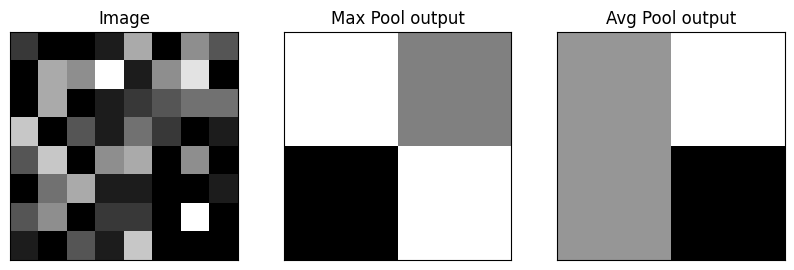

In [41]:
from torch.nn import MaxPool2d, AvgPool2d
import warnings
warnings.filterwarnings('ignore')


def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()


# 2D image
image = np.array([
   		[2, 0, 0, 1, 6, 0, 5, 3],
		[0, 6, 5, 9, 1, 5, 8, 0],
		[0, 6, 0, 1, 2, 3, 4, 4],
		[7, 0, 3, 1, 4, 2, 0, 1],
		[3, 7, 0, 5, 6, 0, 5, 0],
		[0, 4, 6, 1, 1, 0, 0, 1],
		[3, 5, 0, 2, 2, 0, 9, 0],
		[1, 0, 3, 1, 7, 0, 0, 0]])

# Saving output for plots
output = []
titles = []

output.append(image)
titles.append('Image')

image = torch.from_numpy(image.astype(np.float32))
input = image.view((1,1,image.shape[0], image.shape[1]))

#----------MAX POOLING LAYER--------
pool_layer = MaxPool2d(kernel_size=4, stride=4)
op = pool_layer(input)
max_output_img = op.data.numpy()  # Tensor to back in numpy
max_output_img = max_output_img.reshape((-1, max_output_img.shape[-1]))
print('Max Pooling:\n', max_output_img)
print()
output.append(max_output_img)
titles.append('Max Pool output')

#----------AVERAGE POOLING LAYER--------
pool_layer = AvgPool2d(kernel_size=4, stride=4)
op = pool_layer(input)
avg_output_img = op.data.numpy()  # Tensor to back in numpy
avg_output_img = avg_output_img.reshape((-1, avg_output_img.shape[-1]))
print('Avg Pooling:\n',avg_output_img)
print()

output.append(avg_output_img)
titles.append('Avg Pool output')

plot_images(output, titles, tick_params=False)

### Questions

1. Can you think of any other pooling other than max and avg?

Answer)

## 3. Fine-tuning and transfer learning

Now , we will perform image classification using pretrained CNN models (transfer learning). We will understand two approaches, Fine-tuning and Feature extraction using ResNet architecture to train a model to perform traffic sign classification.

To make your task easier, we provide you the starter code to perform the lab exercises. It is expected that you should try to understand what the code does and analyze the output. We will be using Pytorch framework for the implementation of this lab. The training hyperparameters that are used in the code may not be the best to minimize training time according to lab scope.

### German Traffic Sign classification
When a task involves training a CNN on a dataset of images, our first instinct would be to train the network from scratch. However, in practice, CNN has a huge number of parameters, often in the range of millions. Training a CNN on a small dataset greatly affects the network's ability to generalize, often resulting in overfitting.
Therefore, in practice, one would fine-tune existing networks that are trained on a large dataset like the ImageNet (1.2M labeled images) by continue training it (i.e. running back-propagation) on the smaller dataset we have. Provided that our dataset is not drastically different in context to the original dataset (e.g. ImageNet), the pre-trained model will already have learned features that are relevant to our own classification problem.  Here, we will understand the Fine-tuning and Feature extraction approach to transfer learning. In the first one, we will take a pretrained ResNet model and replace the classifier to train it on our dataset. In the second approach, we will freeze the weights of the entire network except the classifier and train it on our data. We will thus, analyse the model performance in both cases. The German Traffic Sign Recognition Benchmark (GTSRB) dataset contains 43 classes of traffic signs, with varying light conditions and rich backgrounds.

In [42]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, SubsetRandomSampler
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import time


In [43]:
# Device configuration (whether to run on GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [44]:
# Set seeds for reproducibility
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

### Load German Traffic Sign dataset
To get an idea of using our own datasets with Pytorch, this time, we will not use Pytorch's builtin datasets. The dataset we will use has more than 50K samples. To make the scenario more realistic, the number of samples in each class is limited to 200 only. And we have also reduced the test set.

In [45]:
!gdown --id 1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x
From (redirected): https://drive.google.com/uc?id=1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x&confirm=t&uuid=e66b478f-d644-4c47-b5ac-e080560e19bd
To: /content/german_traffic_signs_dataset.zip
100% 68.2M/68.2M [00:00<00:00, 95.7MB/s]


In [46]:
# Unzip
!unzip -q german_traffic_signs_dataset.zip

The dataset is stored in a folder structure where samples are separated in classwise folders. We can load the entire dataset using Pytorch's ['ImageFolder'](https://pytorch.org/vision/stable/datasets.html#ImageFolder) class. Then, we can see it like any built-in dataset. As the images are of varying shape, we will resize them to fixed dimensions (224,224) and normalize them in range [0,1]. We will here use data augmentation techniques like Gaussian blur and affine transformation to augment the data. This will increase variations in our data and help our model to generalize well.

In [47]:
transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.GaussianBlur(3),
            transforms.RandomAffine(0, translate=(0.3,0.3), shear=5),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = ImageFolder('german_traffic_signs_dataset/Train', transform=transform)
testset = ImageFolder('german_traffic_signs_dataset/Test', transform=transform)

#### Train, validation and test dataloaders
We will split the trainset further to create train-validation split. We will only train on train data and evaluate the model on validation data at each step. The validation metrics helps us to understand whether model is overfitting the data or not.

In [48]:
# Shuffle and split train set into 80% training and 20% validation set
val_split = 0.2
indices = np.arange(len(trainset))
np.random.shuffle(indices)
partition = int((1-val_split)*len(trainset))

#SubsetRandomSampler will only sample examples from the given subset of data
train_loader = DataLoader(trainset, shuffle=False, sampler=SubsetRandomSampler(indices[:partition]), batch_size=64, num_workers=2)
val_loader = DataLoader(trainset, shuffle=False, sampler=SubsetRandomSampler(indices[partition:]), batch_size=64, num_workers=2)

dataloaders = {'train': train_loader, 'val': val_loader}
dataset_sizes = {'train': partition, 'val': len(train_loader.dataset) - partition}

test_loader = DataLoader(testset, shuffle=False, batch_size=64, num_workers=2)

In [49]:
# Print dataset information
print('Number of training images: ', dataset_sizes['train'])
print('Number of validation images: ', dataset_sizes['val'])
print('Number of test images: ', len(test_loader.dataset))
print('Number of classes: ', len(trainset.classes))

Number of training images:  6880
Number of validation images:  1720
Number of test images:  2000
Number of classes:  43


Helper functions for training/testing

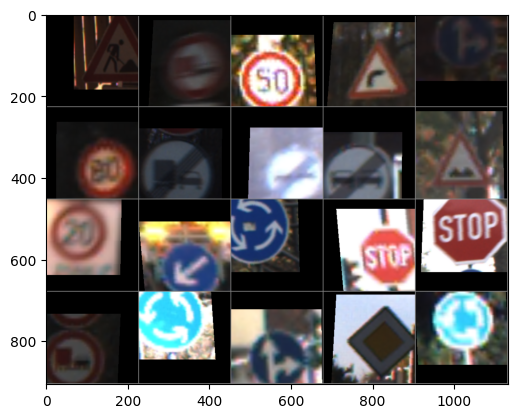

In [50]:
# Helper function to show an image
def plot_image(img):
    img = img / 2 + 0.5                         # unnormalize the image
    npimg = img.numpy()                         # torch to numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # as torch image is (C, H, W)
    plt.show()

# Get some random training images from dataloader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plot images
plot_image(torchvision.utils.make_grid(images[:20], nrow=5))


In [51]:
def train_model(model, criterion, optimizer, dataloaders, num_epochs=10):
    since = time.time()

    # best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_losses = []
    train_acc = []
    val_losses = []
    val_acc = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Enable grads if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Running loss and correct predictions
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            # Save loss and acc values
            if phase == 'train':
              train_losses.append(epoch_loss)
              train_acc.append(epoch_acc)
            else:
              val_losses.append(epoch_loss)
              val_acc.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc*100))

            # Save the best validation accuracy
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc*100))

    return train_losses, val_losses, train_acc, val_acc

In [52]:
def test_model(model, test_loader):
    model.eval()
    test_acc = 0
    correct = 0
    for i, (images, labels) in enumerate(test_loader):
      with torch.no_grad():
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        _, preds = torch.max(output, dim=1)
        correct += (preds == labels).sum()

    test_acc = correct / len(test_loader.dataset)
    print('Test Accuracy: {:.4f}'.format(test_acc*100))


### 1. Finetuning
Here, we will load a pretrained model ResNet18 available in Pytorch and reset final fully connected layer. The model is trained on ImageNet dataset which is a large dataset containing 1000 classes.

In [53]:
# Load pretrained model
model = torchvision.models.resnet18(pretrained=True)

# Reset classifier to 43 output units (number of classes in our dataset)
model.fc = nn.Linear(model.fc.in_features, 43)
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 139MB/s]


#### Define loss function

In [54]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

#### Define optimizer

In [55]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#### Training

In [56]:
# Accuracy on test data before training
test_model(model, test_loader)

Test Accuracy: 2.6500


In [ ]:
history = train_model(model, criterion, optimizer, dataloaders, num_epochs=6)

Epoch 0/5
----------
train Loss: 2.8383 Acc: 36.7442
val Loss: 1.6834 Acc: 71.2791

Epoch 1/5
----------
train Loss: 1.0889 Acc: 85.1163
val Loss: 0.5857 Acc: 94.5349

Epoch 2/5
----------
train Loss: 0.4189 Acc: 96.9041
val Loss: 0.2677 Acc: 98.0233

Epoch 3/5
----------


Plot training plots

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history[0])+1),history[0])
ax.plot(np.arange(1,len(history[1])+1),history[1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'])

#### Evaluate model

In [ ]:
# Accuracy on test data after training
test_model(model, test_loader)

### 2. Feature Extraction
Here, in the second approach, we will create a new instance of network and freeze entire network parameters except the final layer. We need to set ***requires_grad == False*** to freeze the parameters so that the gradients are not computed in backward()

In [ ]:
# Load pretrained model
model_conv = torchvision.models.resnet18(pretrained=True)

# Freeze all parameters
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of new classifier have requires_grad=True by default
# so grads will be computed for classifier only
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 43)

model_conv = model_conv.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.01, momentum=0.9)

In [ ]:
# Evaluate model on test data before training
print('Before training')
test_model(model_conv, test_loader)

####Training

In [ ]:
history = train_model(model_conv, criterion, optimizer_conv, dataloaders, num_epochs=5)

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history[0])+1),history[0])
ax.plot(np.arange(1,len(history[1])+1),history[1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'])

#### Evaluate model

In [ ]:
# Accuracy on test data after training
test_model(model_conv, test_loader)

As you can see, the test accuracy for feature extraction approach is not good compared to the first approach, although we are using pretrained models in both cases. Also, note that the training time was reduced to about half this time. This is obvious as we are not computing all the gradients this time. Experiment with the hyper-parameters like learning rate, epochs, and also optimizers till model convergence.Did you observe any improvement in the performance?

### Exercises

Q 1: Why do you think the network did not achieve good test accuracy in the feature extraction approach?

Answer:

Q 2: Can you think of a scenario where the feature extraction approach would be preferred compared to fine tuning approach?

Answer:

Q 3: Replace the ResNet18 architecture with some other pretrained model in pytorch and try to find the optimal parameters. Report the architecture and the final model performance.

Answer:

Q 4: Which other data augmentations can we used to augment the data?

Answer:

## References and Additional Resources:

*   [Transfer Learning Pytorch tutorial](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html#id1)
*   [Transfer Learning with Convolutional Neural Networks in PyTorch](https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce)
*    [Torchvision models](https://pytorch.org/vision/stable/models.html)
*    [A Comprehensive Hands-on Guide to Transfer Learning with Real-World Applications in Deep Learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)



## References and Additional Resources:

*   [Training a classifier tutorial - Pytorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-an-image-classifier)
*   [Visualizing Filters and Feature Maps in Convolutional Neural Networks using PyTorch](https://debuggercafe.com/visualizing-filters-and-feature-maps-in-convolutional-neural-networks-using-pytorch/)
*   [ConvNetJS CIFAR10 Demo](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html)




# Some more experiments


Now let us update the `apply_filter` function to accept `padding` and `stride` parameters and implement the logic for both.


In [ ]:
def apply_filter(img, filter, padding=0, stride=1):
  # Handle padding first
  if padding > 0:
    # Pad the image with constant values (zeros)
    padded_img = np.pad(img, padding, mode='constant', constant_values=0)
  else:
    padded_img = img

  input_height, input_width = padded_img.shape
  filter_height, filter_width = filter.shape

  # Calculate the output dimensions based on input size, filter size, padding, and stride
  # Formula: (input_dim - filter_dim) / stride + 1
  output_height = (input_height - filter_height) // stride + 1
  output_width = (input_width - filter_width) // stride + 1

  # Initialize the output array with the calculated dimensions
  output = np.zeros((output_height, output_width))

  # Move the filter over the padded image
  # Iterate for output rows
  for i_out in range(output_height):
    i_in = i_out * stride # Determine the starting row in the input image for the current output row
    # Iterate for output columns
    for j_out in range(output_width):
      j_in = j_out * stride # Determine the starting column in the input image for the current output column

      # Extract the current patch from the padded image
      patch = padded_img[i_in : i_in + filter_height, j_in : j_in + filter_width]

      # Perform element-wise multiplication and sum, then assign to the output array
      output[i_out, j_out] = np.sum(np.multiply(patch, filter))

  return output

### Padding Examples

Let's see the effect of padding on the output image size and content using our `apply_filter` function.

In [ ]:
# Ensure all necessary imports are available locally
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Redefine plot_images function to ensure it's in scope
def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()

# Ensure lotus.jpg is available by re-downloading it if needed
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

# Reload lotus.jpg for consistent demonstration
image_lotus = cv2.imread('lotus.jpg', 0)

# Check if the image was loaded successfully
if image_lotus is None or image_lotus.size == 0:
    print("Warning: Could not load 'lotus.jpg' or it's empty. Please ensure the file exists and is valid.")
    # Create a dummy image to avoid further errors for demonstration purposes
    image_lotus = np.zeros((100, 100), dtype=np.uint8) # Create a 100x100 black image
    print("Proceeding with a dummy image.")

# Vertical edge filter
filter_vertical = np.array([[1,0,-1],
                            [1,0,-1],
                            [1,0,-1]])

# Apply filter with padding=1
padded_output = apply_filter(image_lotus, filter_vertical, padding=1)

print(f"Original image shape: {image_lotus.shape}")
print(f"Output image shape with padding=1: {padded_output.shape}")

images_pad = [image_lotus, filter_vertical, padded_output]
titles_pad = ['Original Image', 'Vertical Filter', 'Output with Padding=1']
plot_images(images_pad, titles_pad)

# Apply filter with padding=2
padded_output_2 = apply_filter(image_lotus, filter_vertical, padding=2)
print(f"Output image shape with padding=2: {padded_output_2.shape}")

images_pad_2 = [image_lotus, filter_vertical, padded_output_2]
titles_pad_2 = ['Original Image', 'Vertical Filter', 'Output with Padding=2']
plot_images(images_pad_2, titles_pad_2)


### Stride Examples

Now, let's observe how stride affects the output feature map.

In [ ]:
# Reload lotus.jpg for consistent demonstration
image_lotus = cv2.imread('lotus.jpg', 0)

# Check if the image was loaded successfully (similar to padding example)
if image_lotus is None or image_lotus.size == 0:
    print("Warning: Could not load 'lotus.jpg' or it's empty. Please ensure the file exists and is valid.")
    image_lotus = np.zeros((100, 100), dtype=np.uint8)
    print("Proceeding with a dummy image.")

# Vertical edge filter
filter_vertical = np.array([[1,0,-1],
                            [1,0,-1],
                            [1,0,-1]])

# Apply filter with stride=1 (default behavior, for comparison)
stride_output_1 = apply_filter(image_lotus, filter_vertical, stride=1)

print(f"Original image shape: {image_lotus.shape}")
print(f"Output image shape with stride=1: {stride_output_1.shape}")

images_stride_1 = [image_lotus, filter_vertical, stride_output_1]
titles_stride_1 = ['Original Image', 'Vertical Filter', 'Output with Stride=1']
plot_images(images_stride_1, titles_stride_1)


# Apply filter with stride=2
stride_output_2 = apply_filter(image_lotus, filter_vertical, stride=2)
print(f"Output image shape with stride=2: {stride_output_2.shape}")

images_stride_2 = [image_lotus, filter_vertical, stride_output_2]
titles_stride_2 = ['Original Image', 'Vertical Filter', 'Output with Stride=2']
plot_images(images_stride_2, titles_stride_2)

# Apply filter with stride=3
stride_output_3 = apply_filter(image_lotus, filter_vertical, stride=3)
print(f"Output image shape with stride=3: {stride_output_3.shape}")

images_stride_3 = [image_lotus, filter_vertical, stride_output_3]
titles_stride_3 = ['Original Image', 'Vertical Filter', 'Output with Stride=3']
plot_images(images_stride_3, titles_stride_3)

### Question

What are the primary benefits and drawbacks of using padding and stride in convolutional operations? When might you choose to use one over the other, or both?

---

### Answer

Padding and stride are important hyperparameters in convolutional neural networks, each offering distinct advantages and trade-offs.

---

### Padding

**Benefits**
- Preserves spatial information at the image boundaries  
- Helps maintain or control output size (e.g., *same* padding)  
- Enables deeper networks without rapid shrinking of feature maps  
- Improves learning of edge and corner features  

**Drawbacks**
- Increases computational cost due to larger effective input  
- Introduces artificial values (such as zeros), which may slightly affect boundary activations  

**When to use padding**
- When preserving spatial dimensions is important  
- In early convolutional layers to capture edge information  
- In deep architectures to avoid excessive spatial reduction  

---

### Stride

**Benefits**
- Efficiently reduces spatial dimensions (acts as downsampling)  
- Lowers computation and memory requirements  
- Expands receptive field more quickly  

**Drawbacks**
- May discard fine-grained spatial details  
- Large stride values can cause loss of important information  

**When to use stride**
- When downsampling is desired instead of pooling  
- In deeper layers where precise spatial detail is less critical  
- When computational efficiency is a priority  

---

### Using Padding and Stride Together

Padding and stride are commonly used together to balance information retention and efficiency:
- Padding helps preserve boundary information  
- Stride controls resolution and computational cost  

**Typical design choice**
- Early layers: small stride with padding (retain details)  
- Later layers: larger stride with padding (reduce resolution while maintaining context)

---

### Summary
- Use **padding** to preserve spatial information  
- Use **stride** to control output size and computational efficiency  
- Use **both** to build stable and efficient convolutional networks


## Some more questions

1. Does increasing stride increase output image size?

Answer) No, increasing the stride value decreases the output image size. Stride determines how many pixels the filter shifts over the input image at each step. A larger stride means the filter skips more pixels, resulting in fewer computations and a smaller output feature map.

2. Does increasing padding increase output image size?

Answer) Yes, increasing the padding value increases the output image size (or helps maintain it). Padding involves adding extra rows and columns of zeros (or other values) around the border of the input image. This allows the filter to process pixels closer to the edges and can help preserve the spatial dimensions of the input image in the output.


Certainly! Here's a summary of the answers to your questions:

Does increasing stride increase output image size? No, increasing the stride value decreases the output image size. A larger stride means the convolution filter skips more pixels, resulting in a smaller output feature map.

Does increasing padding increase output image size? Yes, increasing the padding value generally increases the output image size (or helps maintain it at the original input size). Padding adds extra pixels around the image borders, allowing the filter to process edge information and thus preventing the output from shrinking as much.

These are correct observations about how stride and padding affect the output dimensions in convolutional operations.